In [8]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from typing import Dict, List, Any, Optional, Union

def load_json(file_path: str) -> Dict[str, Any]:
    """
    Load JSON data from a file and return it as a dictionary.

    Parameters:
    file_path (str): The path to the JSON file.

    Returns:
    dict: The JSON data as a dictionary.
    """
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def json_to_df(json_data: Dict[str, Dict[str, float]], metric: str, mapping_dict: Optional[Dict[str, str]] = None) -> pd.DataFrame:
    """
    Convert JSON data to a DataFrame.

    Parameters:
        json_data (Dict[str, Dict[str, float]]): The JSON data to be converted.
        metric (str): The name of the metric to be used as column name in the DataFrame.
        mapping_dict (Optional[Dict[str, str]]): Dictionary to map values of 'Ref' column. Defaults to None.

    Returns:
        pd.DataFrame: DataFrame containing the JSON data with columns: 'sample', 'chrom', and the specified metric.
    """
    data = []
    for key, values in json_data.items():
        for ref_key, value in values.items():
            if mapping_dict:
                mapped_ref = mapping_dict.get(ref_key, ref_key)
            else:
                mapped_ref = ref_key
            data.append([key, mapped_ref, value])

    df = pd.DataFrame(data, columns=['sample', 'chrom', metric])
    return df

def remove_samples(df: pd.DataFrame, samples: Union[str, List[str]]) -> pd.DataFrame:
    """
    Remove rows from the DataFrame based on the given sample(s).

    Parameters:
        df (pd.DataFrame): The DataFrame to be cleaned.
        samples (Union[str, List[str]]): Single sample name as a string or list of sample names.

    Returns:
        pd.DataFrame: Cleaned DataFrame with specified samples removed.
    """
    if isinstance(samples, str):
        samples = [samples]
    elif not isinstance(samples, list):
        raise ValueError("Samples must be a string or a list of strings.")
    
    # Check if all sample names are valid
    invalid_samples = set(samples) - set(df['sample'])
    if invalid_samples:
        raise ValueError(f"The following sample names are not present in the DataFrame: {invalid_samples}")

    return df[~df['sample'].isin(samples)]


def merge_and_check_dfs(*dfs: pd.DataFrame) -> pd.DataFrame:
    """
    Merge multiple DataFrames and print if any rows didn't match.

    Parameters:
        *dfs (pd.DataFrame): Variable number of DataFrames to merge.

    Returns:
        pd.DataFrame: Merged DataFrame.
    """
    # Merge DataFrames
    merged_df = dfs[0]
    for df in dfs[1:]:
        merged_df = pd.merge(merged_df, df, how='outer')

    # Check if any rows didn't match
    rows_with_nan = merged_df[merged_df.isna().any(axis=1)]

    if not rows_with_nan.empty:
        print("There are rows that didn't match:")
        print(rows_with_nan)
    else:
        print("All rows matched.")

    return merged_df

In [16]:
# Dict used to rename the chromosomes by a roman number
mapping_dict = {
    'ref|NC_001133|': '1',
    'ref|NC_001134|': '2',
    'ref|NC_001135|': '3',
    'ref|NC_001136|': '4',
    'ref|NC_001137|': '5',
    'ref|NC_001138|': '6',
    'ref|NC_001139|': '7',
    'ref|NC_001140|': '8',
    'ref|NC_001141|': '9',
    'ref|NC_001142|': '10',
    'ref|NC_001143|': '11',
    'ref|NC_001144|': '12',
    'ref|NC_001145|': '13',
    'ref|NC_001146|': '14',
    'ref|NC_001147|': '15',
    'ref|NC_001148|': '16',
    'ref|NC_001224|': 'mit',
}

# mapping_dict = {
#     'ref|NC_001133|': 'I',
#     'ref|NC_001134|': 'II',
#     'ref|NC_001135|': 'III',
#     'ref|NC_001136|': 'IV',
#     'ref|NC_001137|': 'V',
#     'ref|NC_001138|': 'VI',
#     'ref|NC_001139|': 'VII',
#     'ref|NC_001140|': 'VIII',
#     'ref|NC_001141|': 'IX',
#     'ref|NC_001142|': 'X',
#     'ref|NC_001143|': 'XI',
#     'ref|NC_001144|': 'XII',
#     'ref|NC_001145|': 'XIII',
#     'ref|NC_001146|': 'XIV',
#     'ref|NC_001147|': 'XV',
#     'ref|NC_001148|': 'XVI',
#     'ref|NC_001224|': 'mit',
# }

In [28]:
# Upload pi data
file_path = 'diversity.json'
json_data = load_json(file_path)
df_pi = json_to_df(json_data, 'pi', mapping_dict)

# Upload W data
file_path = 'W.json'
json_data = load_json(file_path)
df_w = json_to_df(json_data, 'w', mapping_dict)

df = merge_and_check_dfs(df_pi, df_w)
print(df)

# Sort DataFrame by the numeric value of 'chrom' for the plot
# per chromosome to be in numerical order 
df['chrom'] = pd.to_numeric(df['chrom'])
df.sort_values(by='chrom', inplace=True)

df = remove_samples(df, 'population')
print(df)

All rows matched.
           sample chrom        pi         w
0            AAAA     1  0.000000  0.000000
1            AAAA    10  0.000004  0.000004
2            AAAA    11  0.000002  0.000002
3            AAAA    12  0.000002  0.000002
4            AAAA    13  0.000001  0.000001
...           ...   ...       ...       ...
37291  population     5  0.004664  0.018963
37292  population     6  0.005292  0.019922
37293  population     7  0.004513  0.018440
37294  population     8  0.004284  0.018058
37295  population     9  0.005299  0.019521

[37296 rows x 4 columns]
      sample  chrom        pi         w
0       AAAA      1  0.000000  0.000000
7904    ABKF      1  0.000696  0.000696
30256   RABA      1  0.000251  0.000251
7920    ABKG      1  0.000264  0.000264
30240   RAAZ      1  0.000018  0.000018
...      ...    ...       ...       ...
31895   SABP     16  0.000096  0.000096
6071    ABCV     16  0.001475  0.001475
6055    ABCT     16  0.003423  0.003423
17191   FAAU     16  0.00002

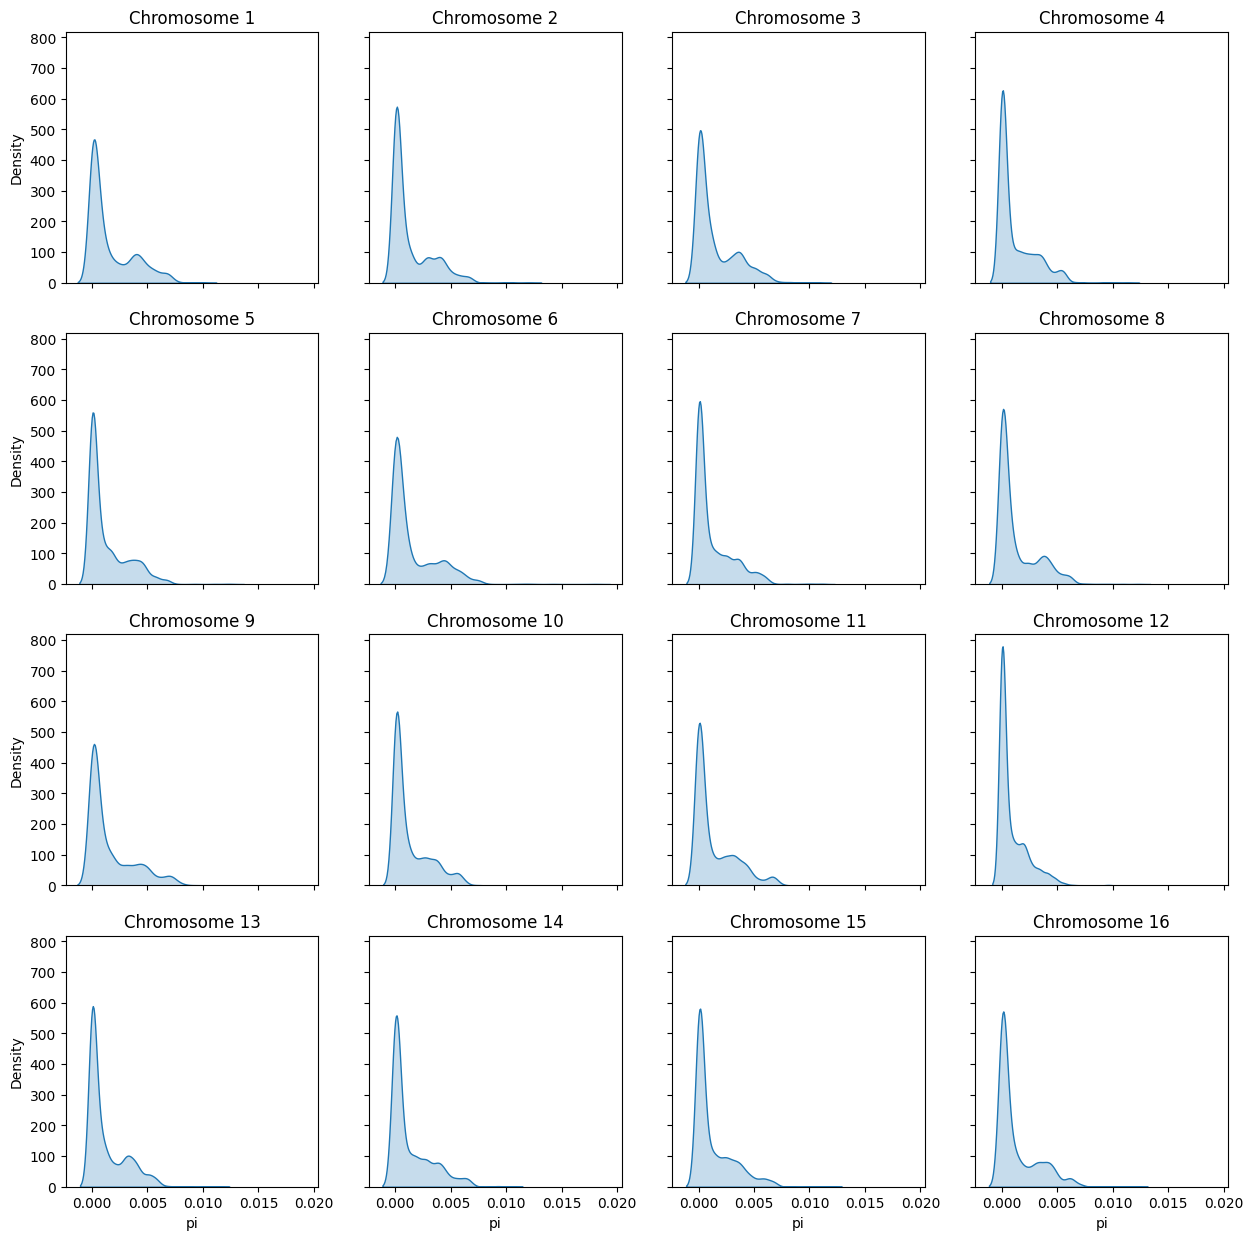

In [33]:
def plot_chromosome_distributions(df: pd.DataFrame, data_column: str, save_filename : str = None) -> None:
    """
    Plots the distribution of a specified data column for each chromosome.

    Parameters:
        df (pandas.DataFrame): DataFrame containing 'chrom' and the specified data column.
        data_column (str): Name of the data column to be plotted.
        save_filename (str, optional): File name to save the plot. If None, the plot is not saved.

    Returns:
        None
    """
    # Convert 'chrom' column to numeric
    df['chrom'] = pd.to_numeric(df['chrom'])

    # Sort DataFrame by the numeric value of 'chrom'
    df.sort_values(by='chrom', inplace=True)

    # Create a grid of plots
    fig, axes = plt.subplots(4, 4, figsize=(15, 15), sharex=True, sharey=True)

    # Iterate through each chromosome and plot its distribution
    for i, (chrom, group) in enumerate(df.groupby('chrom')):
        row = i // 4
        col = i % 4
        ax = axes[row, col]
        sns.kdeplot(data=group[data_column], ax=ax, fill=True)
        ax.set_title(f'Chromosome {chrom}')

    # Save plot if filename is provided
    if save_filename:
        plt.savefig(save_filename)

    plt.show()

plot_chromosome_distributions(df, 'pi', save_filename='pi_distrib.png')